# Perceptron Learning Algorithm
![](2023-01-01-23-51-18.png)
![](2023-01-01-23-52-10.png)
![](2023-01-01-23-54-16.png)
![](2023-01-01-23-54-44.png)
![](2023-01-01-23-55-26.png)

PLA algorithm

$\text{ - step 1: Randomly choose a coefficient vector } \bold{w} \text{ with elements close to 0}$

$\text{ - step 2: Randomly traverse each data point } {\bold{x}}_{i}:$

$\quad \bullet \text{ If } {\bold{x}}_{i} \text{ is correctly classifed or } sgn(\bold{w}^{T} {\bold{x}}_{i})$

$\quad \bullet \text{ If } {\bold{x}}_{i} \text{ is misclassifed, update } \bold{w}:$

$$w = w + {y}_{i} {x}_{i}$$

$\text{ - step 3: Check how many points are misclassified.}$

$\quad \quad \quad \quad \text{If there are no points left, stop the algorithm.}$

$\quad \quad \quad \quad \text{If yes, go back to step 2.}$

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
np.random.seed(2)

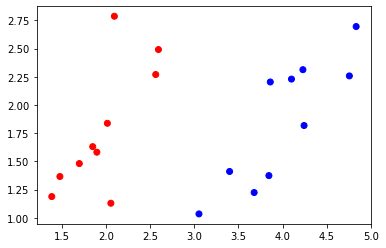

In [17]:
# create data and labels
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

# visualize data
color_list = ['red' if i == 1 else 'blue' for i in y[0]]
plt.scatter(X[0], X[1], c=color_list)
plt.show()

In [18]:
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
X

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [2.09600378, 2.0165464 , 2.05636372, 2.56428901, 1.69909666,
        1.38743695, 1.89780236, 1.47914945, 1.85077455, 2.5949088 ,
        3.67859943, 4.83356383, 3.84571574, 4.23073057, 4.10111622,
        3.40049512, 3.86139612, 4.24389182, 4.75661214, 3.05382082],
       [2.78712178, 1.83761353, 1.12843023, 2.27014838, 1.480339  ,
        1.18759602, 1.58108821, 1.36531996, 1.63030052, 2.49163935,
        1.22339053, 2.69582753, 1.3735299 , 2.31315281, 2.22955963,
        1.40997674, 2.20401356, 1.81774326, 2.25785093, 1.0335785 ]])

In [19]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

In [20]:
def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

In [21]:
def perceptron(X, y, w_init):
    """caculate the weight for the boundary

    Args:
        X (list (m,n + 1)): coordinates of points
        y (list (m,1)): labels
        w_init (list (1,n + 1)): initial weight

    Returns:
        _type_: _description_
    """
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)


In [23]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
perceptron(X, y, w_init)
# (w, m) = perceptron(X, y, w_init)
# print(w)
# print(m)

[array([[ 0.62877581],
       [ 0.06487867],
       [-0.40969545]]), array([[-0.37122419],
       [-4.69173347],
       [-2.66754638]]), array([[ 0.62877581],
       [-2.09682467],
       [-0.17590702]]), array([[ 1.62877581],
       [-0.04046094],
       [ 0.95252321]]), array([[ 0.62877581],
       [-4.87402477],
       [-1.74330432]]), array([[ 1.62877581],
       [-2.30973576],
       [ 0.52684406]]), array([[ 2.62877581],
       [-0.92229882],
       [ 1.71444008]]), array([[ 1.62877581],
       [-4.76801456],
       [ 0.34091018]]), array([[ 2.62877581],
       [-2.91724001],
       [ 1.9712107 ]]), array([[ 3.62877581],
       [-0.32233121],
       [ 4.46285006]]), array([[ 2.62877581],
       [-4.00093064],
       [ 3.23945953]]), array([[ 3.62877581],
       [-1.94456692],
       [ 4.36788976]]), array([[ 2.62877581],
       [-6.77813074],
       [ 1.67206224]]), array([[ 3.62877581],
       [-4.21384173],
       [ 3.94221062]]), array([[ 4.62877581],
       [-2.15747801],
   

In [24]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

In [26]:
def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save 
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


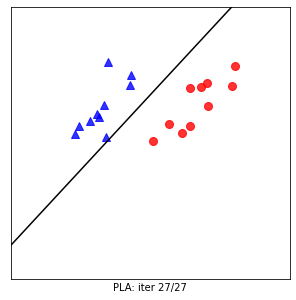

In [29]:
viz_alg_1d_2(w)